## ***all_subs***
#### <font color = grey> training and testing a linear support vector machine on its ability to predict auditory verbal hallucination states in **multiple subjects** with schizophrenia </font>

In [1]:
import os
import numpy as np
import nibabel as nib
import nilearn
import matplotlib.pyplot as plt

from nilearn import image
from nilearn.image import mean_img
from nilearn import plotting
from nilearn.plotting import plot_epi
from scipy import stats
from nilearn.maskers import NiftiMasker

In [4]:
os.chdir("../hallu")
os.getcwd()

'/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu'

In [5]:
%run analysis.py

/Users/grantgonsalves/opt/anaconda3/lib/python3.8/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [6]:
all_subjects = os.listdir("Data")
all_subjects

['S05',
 'S02',
 'S34',
 'S03',
 '.DS_Store',
 'S26',
 'S28',
 'S10',
 'S42',
 'S01',
 'S06',
 'S30',
 'S08',
 'S37',
 'S38',
 'S07',
 'S22',
 'S13',
 'S14',
 'S40',
 'S15',
 'S24',
 'S23',
 'S41']

In [2]:
os.getcwd()

'/Users/grantgonsalves/Desktop/gmg2176/Paris/paris_py'

In [36]:
all_data = {}
data_path     = '/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu'
        
for subject in all_subjects:
    if subject.find('DS') == -1:
        subject_number = int(subject[1:])
        func_path  = os.path.join(os.path.join(data_path, 'Data'), subject)
        print(func_path)
        try:
            all_data[subject_number] = nib.load(func_path+'/S%02d_func.nii' %subject_number)
        except Exception:
            print("Can not load subject", subject_number)

/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S05
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S02
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S34
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S03
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S26
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S28
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S10
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S42
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S01
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S06
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S30
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S08
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S37
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S38
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S07
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S22
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S

In [118]:
# note: not all subjects have 280 images, for ex. S30 has 150 and S42 has 400

all_data[42].shape

(60, 44, 50, 400)

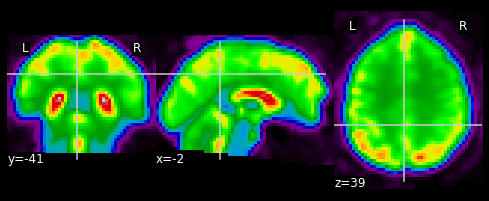

In [37]:
plotting.plot_epi(mean_img(all_data[1]))

In [18]:
all_mean = {}

for subject_number in all_data:
    all_mean[subject_number] = image.mean_img(all_data[subject_number])

In [21]:
all_mean[1].shape

(60, 44, 50)

In [23]:
all_masker = {}

for subject_number in all_mean:
    masker = NiftiMasker(standardize=True, mask_strategy='epi')
    all_masker[subject_number] = masker.fit(all_mean[subject_number])

In [28]:
all_masker

{5: NiftiMasker(mask_strategy='epi', standardize=True),
 2: NiftiMasker(mask_strategy='epi', standardize=True),
 34: NiftiMasker(mask_strategy='epi', standardize=True),
 3: NiftiMasker(mask_strategy='epi', standardize=True),
 26: NiftiMasker(mask_strategy='epi', standardize=True),
 28: NiftiMasker(mask_strategy='epi', standardize=True),
 10: NiftiMasker(mask_strategy='epi', standardize=True),
 42: NiftiMasker(mask_strategy='epi', standardize=True),
 1: NiftiMasker(mask_strategy='epi', standardize=True),
 6: NiftiMasker(mask_strategy='epi', standardize=True),
 30: NiftiMasker(mask_strategy='epi', standardize=True),
 8: NiftiMasker(mask_strategy='epi', standardize=True),
 37: NiftiMasker(mask_strategy='epi', standardize=True),
 38: NiftiMasker(mask_strategy='epi', standardize=True),
 7: NiftiMasker(mask_strategy='epi', standardize=True),
 22: NiftiMasker(mask_strategy='epi', standardize=True),
 13: NiftiMasker(mask_strategy='epi', standardize=True),
 14: NiftiMasker(mask_strategy='epi', 

In [136]:
all_mask = {}

for subject_number in all_masker:
    all_mask[subject_number] = all_masker[subject_number].mask_img_

In [140]:
all_mask

{5: <nibabel.nifti1.Nifti1Image at 0x7fea97ca8280>,
 2: <nibabel.nifti1.Nifti1Image at 0x7fea97aad1c0>,
 34: <nibabel.nifti1.Nifti1Image at 0x7fea97f16d30>,
 3: <nibabel.nifti1.Nifti1Image at 0x7fea97e948b0>,
 26: <nibabel.nifti1.Nifti1Image at 0x7fea97aad430>,
 28: <nibabel.nifti1.Nifti1Image at 0x7fea97c1ca00>,
 10: <nibabel.nifti1.Nifti1Image at 0x7fea97e6afd0>,
 42: <nibabel.nifti1.Nifti1Image at 0x7fea97ef31c0>,
 1: <nibabel.nifti1.Nifti1Image at 0x7fea97fd9670>,
 6: <nibabel.nifti1.Nifti1Image at 0x7fea97fd97f0>,
 30: <nibabel.nifti1.Nifti1Image at 0x7fea97fd98b0>,
 8: <nibabel.nifti1.Nifti1Image at 0x7fea97fd99a0>,
 37: <nibabel.nifti1.Nifti1Image at 0x7fea97fd94f0>,
 38: <nibabel.nifti1.Nifti1Image at 0x7fea97fd9cd0>,
 7: <nibabel.nifti1.Nifti1Image at 0x7fea97fd9d90>,
 22: <nibabel.nifti1.Nifti1Image at 0x7fea97fd9eb0>,
 13: <nibabel.nifti1.Nifti1Image at 0x7fea97fd9f70>,
 14: <nibabel.nifti1.Nifti1Image at 0x7fea97fd9fa0>,
 40: <nibabel.nifti1.Nifti1Image at 0x7fea97fd9a30>,


In [109]:
all_labels = {}
label_path = os.path.abspath("/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu")

for subject_number in all_data:
    all_labels[subject_number] = np.load(label_path+"/S%02dlabels.npy" %subject_number)
    all_labels[subject_number] = np.where(all_labels[subject_number] == 0, 2, all_labels[subject_number])

In [119]:
all_labels[42].shape

(400,)

In [142]:
print("Training decoder to predict labels...")
from nilearn.image import index_img
from nilearn.decoding import Decoder

all_prediction = {}
all_decoder = {}

for subject_number in all_data:
    f_train = index_img(all_data[subject_number], slice(0,-30))
    f_test = index_img(all_data[subject_number], slice(-30,None))
    c_train = all_labels[subject_number][:-30]
    c_test = all_labels[subject_number][-30:]
    print("Testing decoder against unseen data...")
    decoder = Decoder(estimator='svc', mask=all_mask[subject_number], standardize=True)
    all_decoder[subject_number] = decoder.fit(f_train, c_train, groups=None)
    all_prediction[subject_number] = decoder.predict(f_test)
    print("Prediction Accuracy: {:.3f}".format(
    (all_prediction[subject_number] == c_test).sum() / float(len(c_test))))

Training decoder to predict labels...
Testing decoder against unseen data...
Prediction Accuracy: 0.667
Testing decoder against unseen data...
Prediction Accuracy: 0.667
Testing decoder against unseen data...
Prediction Accuracy: 0.633
Testing decoder against unseen data...
Prediction Accuracy: 0.667
Testing decoder against unseen data...
Prediction Accuracy: 0.767
Testing decoder against unseen data...
Prediction Accuracy: 0.867
Testing decoder against unseen data...
Prediction Accuracy: 0.700
Testing decoder against unseen data...
Prediction Accuracy: 0.867
Testing decoder against unseen data...
Prediction Accuracy: 0.867
Testing decoder against unseen data...
Prediction Accuracy: 0.667
Testing decoder against unseen data...
Prediction Accuracy: 0.833
Testing decoder against unseen data...
Prediction Accuracy: 0.800
Testing decoder against unseen data...
Prediction Accuracy: 0.833
Testing decoder against unseen data...
Prediction Accuracy: 0.933
Testing decoder against unseen data...

In [151]:
print("Making pipeline...\n")

from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier

all_trans = {}
all_samples = {}
all_shuff = {}
all_anova = {}
all_cv = {}
all_accuracy = {}
all_null = {}

for subject_number in all_data:
    svc = SVC(kernel='linear', decision_function_shape='ovo', probability=True, C=1)
    feature_selection = SelectKBest(f_classif, k=1000)
    anova_svc = Pipeline([('anova', feature_selection), ('svc', svc)])
    all_trans[subject_number] = all_masker[subject_number].transform(all_data[subject_number])
    all_samples[subject_number] = len(all_trans[subject_number])//2
    all_shuff[subject_number] = np.random.permutation(np.arange(len(all_trans[subject_number])))
    all_anova[subject_number] = anova_svc.fit(all_trans[subject_number][all_shuff[subject_number]][:all_samples[subject_number]], all_labels[subject_number][all_shuff[subject_number]][:all_samples[subject_number]])
    print("Cross-validating...")
    cv = KFold(n_splits=5)
    all_cv[subject_number] = cross_val_score(all_anova[subject_number], all_trans[subject_number], all_labels[subject_number], cv=cv, n_jobs=4) 
    all_accuracy[subject_number] = np.mean(all_cv[subject_number])
    all_null[subject_number] = np.mean(cross_val_score(DummyClassifier(), all_trans[subject_number], all_labels[subject_number], cv=cv, n_jobs=4))
    print("\nClassification Accuracy:")
    print(all_accuracy[subject_number])
    print("\nNull CV Scores:")
    print(all_null[subject_number])

Making pipeline...

Cross-validating...

Classification Accuracy:
0.8142857142857143

Null CV Scores:
0.7857142857142857
Cross-validating...

Classification Accuracy:
0.8607142857142858

Null CV Scores:
0.6321428571428571
Cross-validating...

Classification Accuracy:
0.75

Null CV Scores:
0.7214285714285713
Cross-validating...

Classification Accuracy:
0.7464285714285714

Null CV Scores:
0.6107142857142858
Cross-validating...

Classification Accuracy:
0.7892857142857143

Null CV Scores:
0.6571428571428571
Cross-validating...

Classification Accuracy:
0.875

Null CV Scores:
0.6678571428571429
Cross-validating...

Classification Accuracy:
0.8464285714285715

Null CV Scores:
0.6142857142857142
Cross-validating...

Classification Accuracy:
0.8099999999999999

Null CV Scores:
0.6799999999999999
Cross-validating...

Classification Accuracy:
0.7785714285714287

Null CV Scores:
0.5857142857142856
Cross-validating...

Classification Accuracy:
0.8107142857142857

Null CV Scores:
0.63928571428571

In [156]:
os.getcwd()

'/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu'

In [190]:
print("Displaying SVM weights...\n")

all_anat = {}
data_path     = '/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu'

for subject in all_subjects:
    if subject.find('DS') == -1:
        subject_number = int(subject[1:])
        func_path  = os.path.join(os.path.join(data_path, 'Data'), subject)
        print(func_path)
        try:
            all_anat[subject_number] = nib.load(func_path+'/S%02d_anat.nii' %subject_number)
        except Exception:
            print("Could not load subject", subject_number)

Displaying SVM weights...

/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S05
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S02
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S34
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S03
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S26
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S28
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S10
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S42
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S01
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S06
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S30
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S08
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S37
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S38
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S07
/Users/grantgonsalves/Desktop/gmg2176/Paris/hallu/Data/S22
/Users/grantgonsalves/Desktop

In [233]:
# I don't know how to fix this to display the SVM weights

all_coef = {}
all_plot = {}

for subject_number in all_data:
    coef_img = masker.inverse_transform(feature_selection.inverse_transform(svc.coef_))
    all_coef[subject_number] = all_decoder[subject_number].coef_img_
    all_plot[subject_number] = plotting.plot_stat_map(all_coef[subject_number], bg_img=all_anat[subject_number], title="S%02d_SVM_weights" %subject_number, colorbar=True, dim=-1 );

TypeError: X must be of shape (samples, 47929).